### Offspring Phenotype Model

We start from a simplified form of the Lobster Boys’ equation (eqn. 4), keeping only the genotype and maternal-phenotype terms:

$$
z' = \alpha z + \gamma (m + \varepsilon)
$$

where

- z' = offspring phenotype
- z = genotype-based expectation  
- m = mother’s phenotype  
- $\varepsilon$ = noise  
- $\alpha, \gamma$ = weights on genotype vs. maternal influence  

---

### Reformulation

Define the **maternal deviation**:

$
\delta = m - z'
$

so that : $m = z' + \delta$.  
We also separate mutation-related noise $\varepsilon_{m}$ from phenotypic-inheritance noise $\varepsilon_{p}$.  

The new formulation becomes:

$$
\text{offspring phenotype} = (z + \varepsilon_{m}) + \gamma (\delta + \varepsilon_{p})
$$

---

### Interpretation

- **Genetic baseline**: offspring always inherit \(z + e_m\) (genotype + mutation).  
- **Maternal influence**: with weight \(\gamma\), they copy their mother’s *deviation* from the genetic baseline \delta plus noise from phenotypic inheritance (\(e_p\)).  

Cases:  
- If $\gamma$ = 1: offspring copy mother as faithfully as possible.  
- If $\gamma$ = 0: offspring ignore mother’s phenotype and rely only on long-term genetic information.  
- If 0 < $\gamma$ < 1: maternal effects decay geometrically across generations (e.g. $\gamma^t$ after t generations).  



#### Same sim, 10 dimentions 

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import $$
Image

import statistics


SyntaxError: invalid syntax (3270897540.py, line 5)

In [2]:
#fitness
def w(z_combined):
    return (np.exp(-z_combined**2 /(2))) 

#combined phenotype
def z_dist(z, env_opt):
    if np.size(z, axis=1) != np.size(env_opt,axis=1):
        raise Exception("Sorry, enviromental optima are different from number of dimentions")
    return np.sqrt(np.sum((env_opt - z)**2, axis =1)) #elemnt wise env-z; squared then summed then root


    

In [3]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)
n_dim= 10


# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 1000
env_sequence = []
current_state = 0 

Env = np.array([
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
 ])

#population size
population_size= 1000

In [4]:
##define all sigmas
sigma_mut=0.0004
sigma_mat =0.0002

gamma = np.random.uniform(low=0, high=1, size=population_size).reshape(-1, 1) #take it from (1000,) to (1000,1)

In [5]:
gamma.shape

(1000, 1)

In [6]:
epsilon_m = np.random.normal(0, sigma_mut, size=(population_size, n_dim))
epsilon_p = np.random.normal(0, sigma_mat, size=(population_size, n_dim))

In [7]:
z_a_t= np.random.uniform(low=-0.2, high=0.2, size=(population_size, n_dim)) 

#y_a_t = np.random.uniform(low=-1, high=1, size=(population_size, n_dim))

m_a_t = np.random.uniform(low=-0.2, high=0.2, size=(population_size, n_dim))
delta = m_a_t - (z_a_t + epsilon_m)

P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)

The .reshape(1, -1) method is used in NumPy (and also supported in libraries like scikit-learn) to reshape an array or data structure.

What .reshape(1, -1) Does:

It reshapes a 1D or nD array into a 2D array with:

- 1 row

- -1 tells NumPy to automatically determine the number of columns based on the total number of elements

In [8]:
n_gen=10

In [281]:
optimum_A_over_time=[]

mean_phen_over_time = []
std_phen_over_time = []
mean_mat_over_time  = []
std_mat_over_time  = []

mean_fitness_over_time = []
std_fitness_over_time = []

phenotype_over_time = []
std_phen_over_time= []

mean_delta = []
std_delta = []
mean_gamma = []
std_gamma = []

##start at dry
current_state = 0 


results =  pd.DataFrame()

for t in range(1, n_gen + 1):
          
    # Choose the current environment
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
    # Optimum stats
    A0 = np.array(Env[current_state].reshape(1, -1))
    optimum_A_over_time.append(A0)
        
    
        
    P_com = z_dist(P, A0)
    fitness = w(P_com)
    relative_fitness = fitness / fitness.mean()
    phenotype_over_time.append(P_com.mean())
        
    df = pd.DataFrame({
    'genetic_component': z_a_t.tolist(),
    'gen_plus_mut': (z_a_t + epsilon_m).tolist(),
    'Phenotype': P.tolist(),
    'gamma': gamma.tolist(),
    'maternal_phenotype': m_a_t.tolist(),
    'delta': delta.tolist(),
    'maternal_comp_werror': (delta + epsilon_p).tolist(),
    'fitness': fitness.flatten().tolist(),
    'relative_fitness': relative_fitness.flatten().tolist()
    })

    gen_stats = pd.DataFrame([{
        'Generation': t,
        'Environment': current_state,
        
        'Mean_fitness': df['fitness'].mean(),
        'Std_fitness': df['fitness'].std(),
        
        'Mean_phenotype': np.mean(np.vstack(df['Phenotype']), axis=0),
        'Std_phenotype': np.std(np.vstack(df['Phenotype']), axis=0),
        
        'Mean_maternal_phenotype': np.mean(np.vstack(df['maternal_phenotype']), axis=0),
        'Std_maternal_phenotype': np.std(np.vstack(df['maternal_phenotype']), axis=0),
        
        'Mean_delta': np.mean(np.vstack(df['delta']), axis=0),
        'Std_delta': np.std(np.vstack(df['delta']), axis=0),
        
        'Mean_gamma': np.mean(np.vstack(df['gamma']), axis=0),
        'Std_gamma': np.std(np.vstack(df['gamma']), axis=0),
        
        'Mean_genetic': np.mean(np.vstack(df['genetic_component']), axis=0),
        'Std_genetic': np.std(np.vstack(df['genetic_component']), axis=0),
        
        'Mean_gen_plus_mut': np.mean(np.vstack(df['gen_plus_mut']), axis=0),
        'Std_gen_plus_mut': np.std(np.vstack(df['gen_plus_mut']), axis=0),
        
        'Mean_maternal_comp_werror': np.mean(np.vstack(df['maternal_comp_werror']), axis=0),
        'Std_maternal_comp_werror': np.std(np.vstack(df['maternal_comp_werror']), axis=0),
        
        # If you have relative_fitness too
        'Mean_relative_fitness': df['relative_fitness'].mean(),
        'Std_relative_fitness': df['relative_fitness'].std()
    }])

    results = pd.concat([results, gen_stats], ignore_index=True)
    
    
    # Resample for next generation
    sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
    
    # Update population for next generationpurple
    z_a_t = np.vstack(sampled_df['genetic_component'].values)
    P = np.vstack(sampled_df['Phenotype'].values)
    gamma = np.vstack(sampled_df['gamma'].values)
    m_a_t = np.vstack(sampled_df['maternal_phenotype'].values)


    #update delta for the next genn_gen
    delta = P - m_a_t

    
    # Sample variances
    epsilon_m = np.random.normal(0, sigma_mut, size=(population_size, n_dim))
    epsilon_p = np.random.normal(0, sigma_mat, size=(population_size, n_dim))

    #Phenotype update
    P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)
        


In [9]:
results.head()


NameError: name 'results' is not defined

In [230]:
np.vstack(sampled_df['genetic_component'].values).shape

(1000, 10)

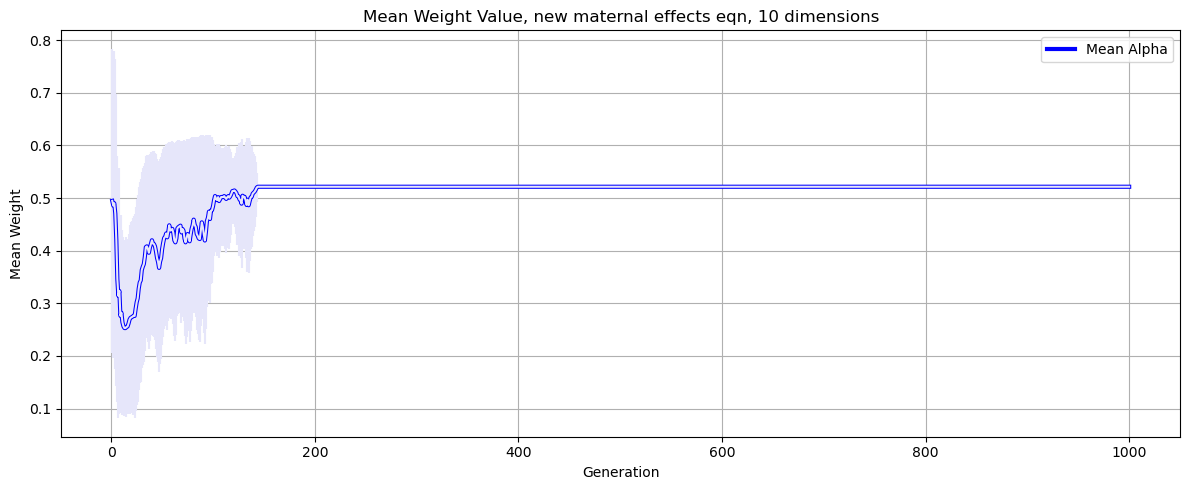

In [284]:
plt.figure(figsize=(12, 5))

generations = results['Generation']

# Plot Mean Alpha
y = np.hstack(results['Mean_gamma'])
error = np.hstack(results['Std_gamma'])

plt.errorbar(generations, y, yerr=error, color='lavender')
plt.plot(generations, y, label='Mean Alpha', color='blue', linewidth=3)


plt.title('Mean Weight Value, new maternal effects eqn, 10 dimensions')
plt.xlabel('Generation')
plt.ylabel('Mean Weight')

#plt.xlim(0,10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Varying staying probability

In [14]:
# Parameters
n_gen = 2000
population_size = 1000
Env = np.array([-0.9, 0.5])

sigma_mut = 0.04
sigma_mat = 0.02

sp_values = np.linspace(0, 1, 100)
equilibrium_gamma_means = []

# Select 10 indices from 0 to 99 to save trajectories for
selected_indices = np.linspace(0, 99, 10, dtype=int)
selected_sp_values = sp_values[selected_indices]

# To store mean gamma trajectories for selected sp values
gamma_trajectories = {sp: [] for sp in selected_sp_values}

for sp in sp_values:
    Transition_probs = np.array([
        [sp, 1-sp],
        [1-sp, sp]
    ])
    
    current_state = 0
    gamma = np.random.uniform(low=0, high=1, size=population_size).reshape(-1, 1)
    epsilon_m = np.random.normal(0, sigma_mut, size=(population_size, n_dim))
    epsilon_p = np.random.normal(0, sigma_mat, size=(population_size, n_dim))
    z_a_t = np.random.uniform(low=-0.2, high=0.2, size=(population_size,n_dim))
    m_a_t = np.random.uniform(low=-0.2, high=0.2, size=(population_size, n_dim))
    
    delta =   m_a_t -(z_a_t + epsilon_m)
    P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)
    
    mean_gamma_over_time = []  # record mean gamma each gen if this sp is selected

    for t in range(1, n_gen + 1):
        current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
        current_env = Env[current_state]
        
        P_com = z_dist(P, current_env)
        fitness = w(P_com)
        relative_fitness = fitness / fitness.mean()
        
        df = pd.DataFrame({
            'genetic_component': z_a_t,
            'gen_plus_mut': (z_a_t + epsilon_m),
            'Phenotype': P,
            'gamma': gamma,
            'maternal_phenotype': m_a_t,
            'delta': delta,
            'maternal_comp_werror': (delta + epsilon_p),
            'fitness': fitness,
            'relative_fitness': relative_fitness
        })
        
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        z_a_t = sampled_df['genetic_component'].values
        P = sampled_df['Phenotype'].values
        gamma = sampled_df['gamma'].values
        m_a_t = sampled_df['maternal_phenotype'].values
        
        delta = m_a_t - P
        epsilon_m = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_p = np.random.normal(0, sigma_mat, size=population_size)
        P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)

        # If this sp is in the selected set, record mean gamma
        if sp in gamma_trajectories:
            mean_gamma_over_time.append(np.mean(gamma))  # hash-based key-value stores--> look up python jargon sorrounding this 
    
    equilibrium_mean_gamma = np.mean(gamma)
    equilibrium_gamma_means.append(equilibrium_mean_gamma)

    # Save trajectory if selected
    if sp in gamma_trajectories:
        gamma_trajectories[sp] = mean_gamma_over_time




IndexError: tuple index out of range

In [291]:

sp_values = np.linspace(0, 1, 100)
equilibrium_gamma_means = []

selected_indices = np.linspace(0, 99, 10, dtype=int)
selected_sp_values = sp_values[selected_indices]

gamma_trajectories = {sp: [] for sp in selected_sp_values}

for sp in sp_values:
    Transition_probs = np.array([
        [sp, 1 - sp],
        [1 - sp, sp]
    ])
    
    current_state = 0
    
    # Initialize multi-dimensional arrays
    gamma = np.random.uniform(0, 1, size=(population_size)).reshape(-1, 1)
    z_a_t = np.random.uniform(-0.2, 0.2, size=(population_size, n_dim))
    m_a_t = np.random.uniform(-0.2, 0.2, size=(population_size, n_dim))
    epsilon_m = np.random.normal(0, sigma_mut, size=(population_size, n_dim))
    epsilon_p = np.random.normal(0, sigma_mat, size=(population_size, n_dim))
    
    delta = (z_a_t + epsilon_m) - m_a_t
    P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)
    
    mean_gamma_over_time = []
    
    for t in range(1, n_gen + 1):
        # Update environment state
        current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
        current_env = Env[current_state].reshape(1, -1)  # shape (1, n_dim)
        
        # Calculate phenotype components relative to current environment
        P_com = z_dist(P, current_env)  # Assume z_dist handles broadcasting properly
        
        fitness = w(P_com)
        relative_fitness = fitness / fitness.mean()
        
        # Create DataFrame: convert arrays row-wise to lists to satisfy pandas columns
        df = pd.DataFrame({
            'genetic_component': [list(row) for row in z_a_t],
            'gen_plus_mut': [list(row) for row in (z_a_t + epsilon_m)],
            'Phenotype': [list(row) for row in P],
            'gamma': gamma.flatten(),
            'maternal_phenotype': [list(row) for row in m_a_t],
            'delta': [list(row) for row in delta],
            'maternal_comp_werror': [list(row) for row in (delta + epsilon_p)],
            'fitness': fitness.flatten(),  
            'relative_fitness': relative_fitness.flatten()
        })
        
        # Resample population weighted by relative fitness
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True).reset_index(drop=True)
        
        # Extract numpy arrays from lists in DataFrame columns
        z_a_t = np.vstack(sampled_df['genetic_component'].values)
        P = np.vstack(sampled_df['Phenotype'].values)
        gamma = np.vstack(sampled_df['gamma'].values)
        m_a_t = np.vstack(sampled_df['maternal_phenotype'].values)
        
        delta = P - m_a_t
        
        epsilon_m = np.random.normal(0, sigma_mut, size=(population_size, n_dim))
        epsilon_p = np.random.normal(0, sigma_mat, size=(population_size, n_dim))
        
        P = (z_a_t + epsilon_m) + gamma * (delta + epsilon_p)
        
        if sp in gamma_trajectories:
            mean_gamma_over_time.append(np.mean(gamma))
    
    equilibrium_mean_gamma = np.mean(gamma)
    equilibrium_gamma_means.append(equilibrium_mean_gamma)
    
    if sp in gamma_trajectories:
        gamma_trajectories[sp] = mean_gamma_over_time


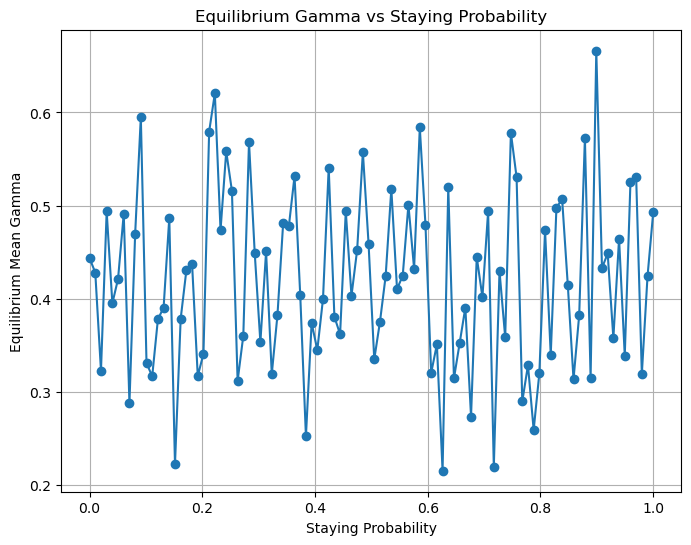

In [288]:
# Plot staying probability vs equilibrium gamma
plt.figure(figsize=(8,6))
plt.plot(sp_values, equilibrium_gamma_means, '-o')
plt.xlabel('Staying Probability')
plt.ylabel('Equilibrium Mean Gamma')
plt.title('Equilibrium Gamma vs Staying Probability')
plt.grid(True)
plt.show()

In [290]:
df ['gamma']

0      [0.000676829514459576, 0.3378166810868296, 0.4...
1      [0.000676829514459576, 0.3378166810868296, 0.4...
2      [0.000676829514459576, 0.3378166810868296, 0.4...
3      [0.000676829514459576, 0.3378166810868296, 0.4...
4      [0.000676829514459576, 0.3378166810868296, 0.4...
                             ...                        
995    [0.000676829514459576, 0.3378166810868296, 0.4...
996    [0.000676829514459576, 0.3378166810868296, 0.4...
997    [0.000676829514459576, 0.3378166810868296, 0.4...
998    [0.000676829514459576, 0.3378166810868296, 0.4...
999    [0.000676829514459576, 0.3378166810868296, 0.4...
Name: gamma, Length: 1000, dtype: object